In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from parsing import parser, digit
from plotting import plotter, voronoi
from analysis import training, sampling
from config import settings

In [3]:
n_observation_classes = 256
n_hidden_states = 40

In [4]:
parse = parser.Parser();
train_digits = parse.parse_file('data/pendigits-train');
test_digits = parse.parse_file('data/pendigits-test')

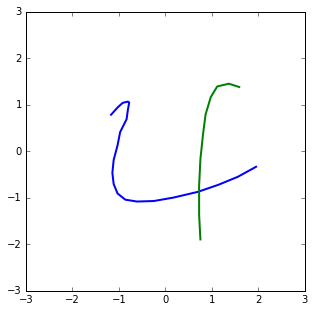

In [12]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(train_digits[6], True)

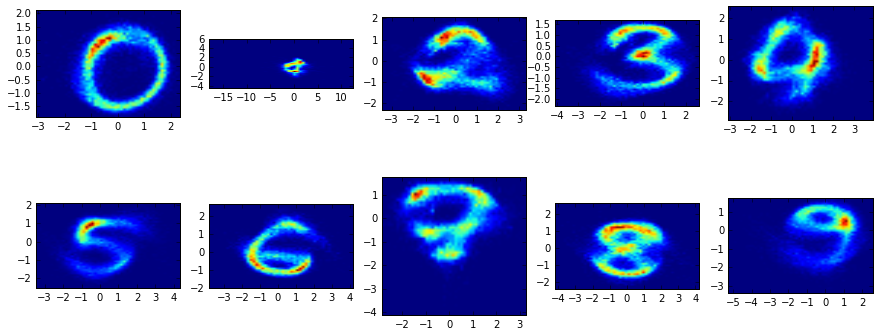

In [13]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digits_heatmap(train_digits, True);

In [14]:
centroids = training.get_digit_kmeans_centroids(train_digits, n_observation_classes - 2)

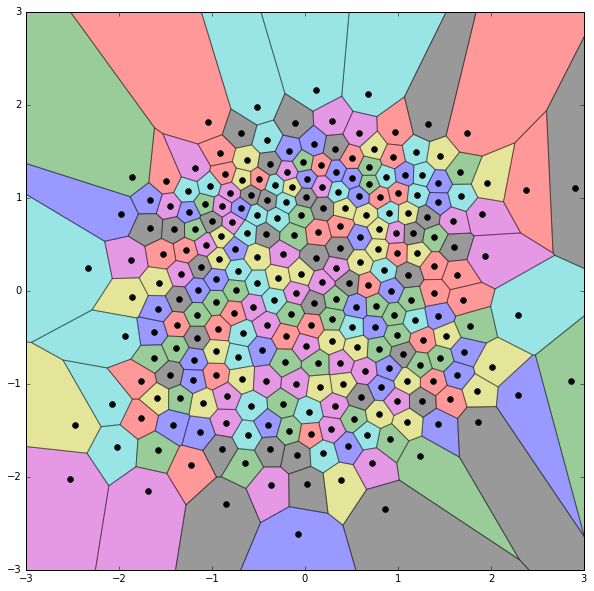

In [167]:
pylab.rcParams['figure.figsize'] = (10, 10);
voronoi.plot_centroids(centroids);

In [168]:
training.set_digit_observations(train_digits, centroids, n_observation_classes)

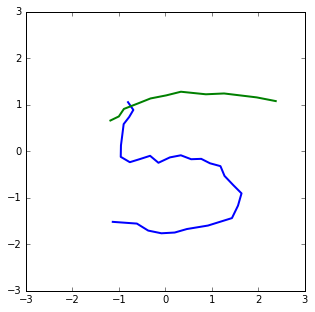

In [222]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit_observations(train_digits[8], centroids, n_observation_classes, True)

In [223]:
hidden_markov_models = training.train_hmm(train_digits, n_observation_classes, n_hidden_states)

In [224]:
samplings = sampling.get_samplings(hidden_markov_models, n_observation_classes, centroids, 1, 10)

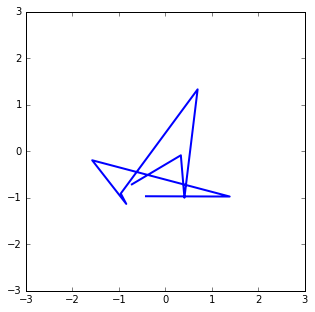

In [226]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(samplings[5][0], True)